<a href="https://colab.research.google.com/github/roheth286/Fake-News-Model/blob/main/Fake_News_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI/ML Task**


---
In this task, we will develop a Fake News Detection Model using Natural Language Processing
(NLP) techniques. The goal is to classify news articles as real or fake based on textual features. This
will help in identifying misleading information and ensuring news credibility.


Step-by-Step Breakdown :

1. Data Preparation
  * Load the Fake News dataset.
  * Handle missing values and clean the data.
  * Encode categorical features and scale numerical data.

2. Feature Extraction
  * Convert text data into numerical form using TF-IDF, Count Vectorizer, or Word
Embeddings.

3. Machine Learning Model Training
  * Train  basic classification models.
  * Optimize model with feature selection and tuning.

4. Model Evaluation

    * Measure performance using accuracy, precision, recall, and F1-score.
    * Generate a classification report to analyse predictions.

# **Dataset of Fake News Datasets**


---

Save the dataset to your local system and upload it when prompted in the import dataset cell.

Link(Training dataset): https://drive.google.com/file/d/1YpjG-avc4DA8TqSe5wfq8b76tXWaNzG1/view?usp=drive_link

Link(Testing dataset): https://drive.google.com/file/d/19LO-EbQdlZ7Uw6G8BdkPKE2ej4UsVK7V/view?usp=drive_link

# **Import necessary libraries**



---



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# **Import Dataset**



---



1.   User prompt to upload the csv file.
2.   Reads the Train.csv file into a Pandas DataFrame (df).
3.   Display the first few rows




In [ ]:
print("Upload the trianing dataset")
train_file = files.upload()
print("Upload the testing dataset")
test_file = files.upload()
train_df = pd.read_csv(list(train_file.keys())[0])
test_df = pd.read_csv(list(test_file.keys())[0])
print("Training Data:")
display(train_df.head())
print("\nTesting Data:")
display(test_df.head())


Upload the trining dataset


Saving train.csv to train.csv
Upload the testing dataset


Saving test.csv to test.csv
Training Data:


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1



Testing Data:


,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


# **Data Cleaning**



---

In this section, we performed essential data cleaning steps to prepare the dataset for training the Fake News Detection Model.

1. Checked for Missing Values – Identified and removed rows with missing values in critical columns to avoid data inconsistencies.

2. Combined Text Features – Merged the title, author, and text columns into a single feature (full_text) to capture all textual information.

3. Converted Text to Lowercase – Ensured uniformity by converting all text to lowercase, preventing duplicate words in different cases.

4. Removed Special Characters & Extra Spaces – Eliminated unnecessary symbols and multiple spaces to maintain clean input for the model.

5. Removed Stopwords & Applied Lemmatization – Filtered out common English stopwords and reduced words to their base forms (e.g., "running" → "run") to improve model performance.

6. Applied Preprocessing to Both Train & Test Datasets – Ensured that both datasets underwent the same text-cleaning steps to maintain uniformity in feature extraction.

6. Verified Final Dataset – Displayed the first few rows of the cleaned dataset to confirm successful preprocessing.

In [ ]:
import numpy as np
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

train_df.dropna(inplace=True)

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stopwords.words('english')])
    return text

train_df['full_text'] = train_df['title'].fillna('') + " " + train_df['author'].fillna('') + " " + train_df['text'].fillna('')
test_df['full_text'] = test_df['title'].fillna('') + " " + test_df['author'].fillna('') + " " + test_df['text'].fillna('')

train_df['cleaned_text'] = train_df['full_text'].apply(clean_text)
test_df['cleaned_text'] = test_df['full_text'].apply(clean_text)

print(train_df[['cleaned_text', 'label']].head())
print(test_df[['cleaned_text']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                        cleaned_text  label
0  house dem aide even see comey letter jason cha...      1
1  flynn hillary clinton big woman campus breitba...      0
2  truth might get fired consortiumnews com truth...      1
3  15 civilian killed single u airstrike identifi...      1
4  iranian woman jailed fictional unpublished sto...      1
                                        cleaned_text
0  specter trump loosens tongue purse string sili...
1  russian warship ready strike terrorist near al...
2  nodapl native american leader vow stay winter ...
3  tim tebow attempt another comeback time baseba...
4  keiser report meme war e995 truth broadcast ne...


#  **Feature Extraction**

---
In this section, we converted the cleaned text into numerical representations using TF-IDF (Term Frequency-Inverse Document Frequency) to prepare the data for model training.

1. Why TF-IDF?

    * Unlike raw word counts, TF-IDF assigns importance to unique words while reducing the weight of common words (e.g., "the", "is").
    * It helps improve the performance of Logistic Regression by creating a sparse numerical representation of text data.

2. Initialized TF-IDF Vectorizer – Limited to 5,000 features to balance information retention and computational efficiency.

3. Transformed Training Data – Converted the cleaned text into numerical feature vectors.

4. Applied Same Transformation to Test Data – Ensured consistency by using the same vocabulary from training data on the test dataset.

5. Extracted Target Labels – Separated the label column from the training data for supervised learning.

6. Verified Feature Matrix Dimensions – Printed the shape of transformed data to confirm correct processing.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['cleaned_text'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['cleaned_text'])
y_train = train_df['label'].values
print(f"Train Data Shape: {X_train_tfidf.shape}")
print(f"Test Data Shape: {X_test_tfidf.shape}")

Train Data Shape: (18285, 5000)
Test Data Shape: (5200, 5000)


#   **Model Training (Logistic Regression)**

---

In this section, we split the training dataset into training and validation sets, trained a Logistic Regression model, and evaluated its performance.

1. Split the Dataset – Used train_test_split to divide the dataset into an 80% training set and 20% validation set, ensuring unbiased evaluation.

2. Initialized the Model – Created a Logistic Regression model with max_iter=1000 to ensure proper convergence.

3. Trained the Model – Applied log_reg_model.fit(X_train_split, y_train_split) to train the model on the TF-IDF transformed training subset.

4. Validated the Model – Kept aside 20% of the training data (X_val_tfidf) to measure model accuracy and avoid overfitting.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

X_train_split, X_val_tfidf, y_train_split, y_val = train_test_split(
    X_train_tfidf, y_train, test_size=0.2, random_state=42
)

log_reg_model.fit(X_train_split, y_train_split)

LogisticRegression(max_iter=1000)

# **Model Evaluation and Performance Analysis**

---
In this section, we trained a Logistic Regression model, evaluated its performance using various metrics, and plotted the ROC Curve for a better understanding of classification effectiveness.

1. Making Predictions :

    * The trained model was used to predict labels for the validation dataset (X_val_tfidf).
    * Probability scores were also extracted using predict_proba() to assess model confidence.

2. Model Evaluation Metrics:
    * Accuracy Score – Measures overall correct predictions.
    * Classification Report – Provides Precision, Recall, and F1-score for both classes (Fake & Real).
    * ROC Curve & AUC Score – Evaluates how well the model separates the classes.


3. ROC Curve Analysis:
    * The ROC curve was plotted using roc_curve(), showing the trade-off between True Positive Rate (TPR) and False Positive Rate (FPR).

    * The AUC (Area Under Curve) score quantifies the model’s ability to distinguish between real and fake news.

Model Performance on Validation Data:
Accuracy: 0.9535

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2082
           1       0.96      0.94      0.95      1575

    accuracy                           0.95      3657
   macro avg       0.95      0.95      0.95      3657
weighted avg       0.95      0.95      0.95      3657



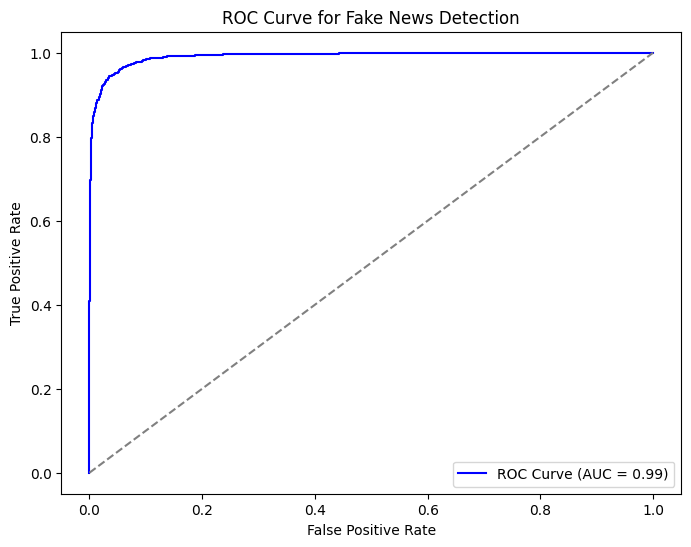

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

val_predictions = log_reg_model.predict(X_val_tfidf)

val_probabilities = log_reg_model.predict_proba(X_val_tfidf)[:, 1]

accuracy = accuracy_score(y_val, val_predictions)
report = classification_report(y_val, val_predictions)

fpr, tpr, _ = roc_curve(y_val, val_probabilities)
roc_auc = auc(fpr, tpr)
s
print("Model Performance on Validation Data:")
print("=====================================")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fake News Detection')
plt.legend(loc='lower right')
plt.show()


# **General Summary of Fake News Model**

---



Our Logistic Regression model has been trained and evaluated, achieving strong classification results. Below is an analysis of its key performance metrics, potential errors, and future improvements.

1. Explanation of Metrics:

    * Accuracy: 95.35%

      * Definition: Accuracy measures the percentage of correctly classified instances (both fake and real news).

      * Interpretation: Out of 3657 validation samples, about 95.35% were correctly classified.

      * Limitation: Accuracy alone does not reveal model weaknesses (e.g., bias toward one class).

    * Precision:

      * Definition: Precision answers: "Out of all predicted instances for a class, how many were actually correct?"
      * For Class 0 (Real News): 95% of articles predicted as real were actually real.
      *For Class 1 (Fake News): 96% of articles predicted as fake were actually fake.

      * Implication: A high precision means fewer false positives (i.e., real news wrongly flagged as fake).

    * Recall (Sensitivity)

      * Definition: Recall answers: "Out of all actual instances of a class, how many did we correctly identify?"
      * For Class 0 (Real News): 97% of real news was correctly identified.
      * For Class 1 (Fake News): 94% of fake news was correctly identified.
      * Implication: High recall means fewer false negatives (i.e., fake news slipping through as real).

    * F1-Score

      * Definition: The harmonic mean of Precision & Recall, ensuring a balance between them.
      * Class 0 (Real News): 0.96 (strong balance of precision and recall).
      * Class 1 (Fake News): 0.95 (also well-balanced).
      * Implication: The model performs consistently well for both classes.

    * ROC-AUC Score: 0.99

      * Definition: The Receiver Operating Characteristic - Area Under Curve (ROC-AUC) score evaluates the model’s ability to distinguish between fake and real news.
      * Interpretation: A score of 0.99 (very close to 1.0) means the model has an excellent ability to differentiate between fake and real news.

1. Possible Errors in the Model:

    * False Positives (FP) – Real News misclassified as Fake

      * Some legitimate news articles might be wrongly labeled as fake.

      * Cause: Over-sensitivity in detecting fake news patterns.

      * Impact: Reduces credibility as true articles may get flagged incorrectly.

    * False Negatives (FN) – Fake News misclassified as Real:

      * Some fake news articles might slip through as real.
      * Cause: The model might struggle with sophisticated fake news that mimics real news style.
      *Impact: Dangerous as misinformation could be undetected.


3. Future Enhancements:

    * Improve Text Preprocessing

      * Expand stopword removal: Some words may not contribute to meaning.

      * Use stemming instead of lemmatization to further reduce word forms.

    * Experiment with Feature Engineering

      * Use n-grams (bigrams, trigrams) to capture multi-word patterns in text.
      * Include word embeddings (Word2Vec, GloVe, BERT) instead of simple TF-IDF.

    * Try More Advanced Models

      * Deep Learning: Implement LSTMs or Transformers (BERT) for improved text understanding.
      * Ensemble Learning: Combine multiple classifiers (e.g., Logistic Regression + Random Forest) for better performance.

    * Fine-tune Hyperparameters

      * Adjust regularization strength in Logistic Regression to reduce overfitting.
      * Optimize TF-IDF max features to avoid unnecessary words.
      
**Conclusion**


---

This Logistic Regression model performs exceptionally well (Accuracy: 95.35%, ROC-AUC: 0.99), meaning it effectively detects fake news. However, false negatives (missed fake news) remain a risk. Future improvements with better preprocessing, feature engineering, and deep learning techniques can enhance accuracy further while ensuring misinformation detection remains strong.